# Lab 2: Mine Crafting

# Part 1: The Ideal Case

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, quad

G = 6.6743E-11 # m^3/kg/s^2
g0 = 9.81 # Acceleration due to gravity
massEarth = 5.972e24 # kg
massMoon = 7.35e22 # kg
radiusEarth = 6378.1e3 # m
radiusMoon = 1738.1e3 # m
earthRot = 7.272E-5 # rad/s

Free fall time: 28.55686245854129 seconds
Numerical free-fall time: 28.556862458541275 seconds and at y = -4000.0000000000005 m
The difference between the numerical solution and the analytical solution is -1.4210854715202004e-14 seconds


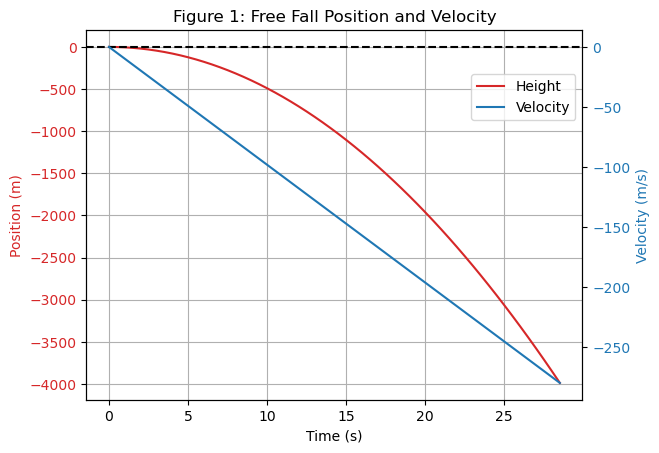

In [65]:
# Part 1
d = 4000 # m
timeFall = np.sqrt(2*d/g0)
print(f'Free fall time: {timeFall} seconds')

alpha = 0 # alpha is 0 in part 1 since there is no drag
gamma = 2
y0 = 0 # m
v0 = 0 # m/s
x0 = [y0, v0]

t0, tf = 0, 1000
t_span = np.linspace(t0, tf, 2000)

def system(t, x):
    y, v = x
    dydt = v
    dvdt = -g0 + alpha*np.abs(v)**gamma
    return [dydt, dvdt]


def difference(t, x):
    return x[0] + 4000
difference.terminal = True

# Solving
soln = solve_ivp(fun = system, t_span = (t0, tf), y0=x0, t_eval=t_span, events = difference)
tVals = soln.t
yVals = soln.y[0]
vVals = soln.y[1]

fig, ax = plt.subplots()
ax.plot(tVals, yVals, label="Height", color="tab:red") 
ax.axhline(0, color="black", linestyle="--")  # Bottom of the shaft
ax.tick_params(axis="y", labelcolor="tab:red")#using tab to color code the labels
ax.set_xlabel("Time (s)")
ax.set_ylabel("Position (m)", color="tab:red")
ax1 = ax.twinx()
ax1.set_ylabel("Velocity (m/s)", color="tab:blue")
ax1.plot(tVals, vVals, label="Velocity", color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")
ax.set_title("Figure 1: Free Fall Position and Velocity") # FIGURE 1
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax1.get_legend_handles_labels()
ax.legend(lines1 + lines2, labels1 + labels2, bbox_to_anchor=(1, 0.9))
ax.grid()

# Number 4:
#solution for free-fall time
print(f"Numerical free-fall time: {soln.t_events[0][0]} seconds and at y = {soln.y_events[0][0][0]} m")
print(f"The difference between the numerical solution and the analytical solution is {soln.t_events[0][0]-timeFall} seconds")

# Part 2: Including Drag and a Variable g

Hits the bottom at 83.49323777912096 seconds and -4000.0 m
Hits bottom at 83.49323777912096 seconds and -4000.0 m


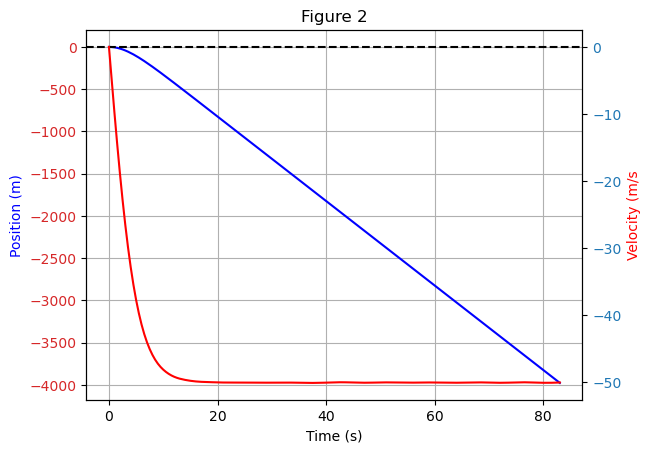

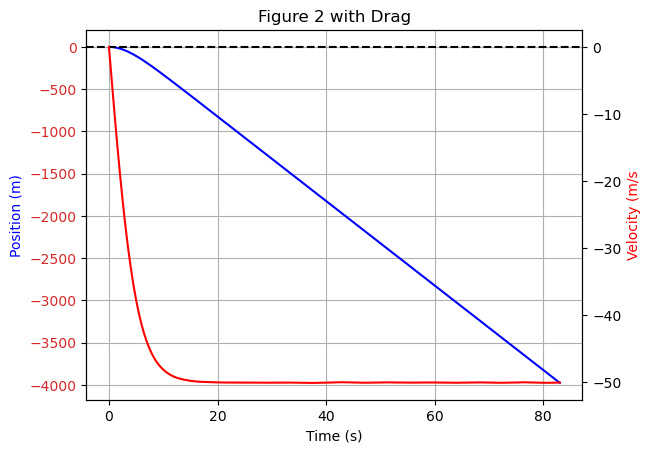

In [69]:
# Part 2
def grav(r):
    gR = g0*(r/radiusEarth)
    return gR
def system(t, x):
    y, v = x
    dydt = v
    dvdt = -grav(y + radiusEarth) + alpha*np.abs(v)**gamma
    return [dydt, dvdt]
def difference(t, x):
    return x[0] + 4000 # adding the shaft height
difference.terminal = True

# Solving
t0, tf = 0, 1000
t_span = np.linspace(t0, tf, 2000)
soln = solve_ivp(fun = system, t_span = (t0, tf), y0=x0, t_eval=t_span, events = difference)
tVals = soln.t
yVals = soln.y[0]
vVals = soln.y[1]

# Plotting
fig, ax = plt.subplots()
ax.plot(tVals, yVals, label = 'Position (m)', color = 'blue')
ax1 = ax.twinx()
ax1.plot(tVals, vVals, label = 'Velocity (m/s)', color = 'red')
ax.set_ylabel('Position (m)', color='blue')
ax.set_xlabel('Time (s)')
ax1.set_ylabel('Velocity (m/s', color = 'red')
ax.axhline(0, color="black", linestyle="--")  # Bottom of the shaft
ax.tick_params(axis="y", labelcolor="tab:red")
ax1.tick_params(axis="y", labelcolor="tab:blue")
ax.set_title('Figure 2')
ax.grid()
print(f'Hits the bottom at {soln.t_events[0][0]} seconds and {soln.y_events[0][0][0]} m')

# With drag
alpha = 0.003919 # NO DRAG
gamma = 2
y0 = 0 # m
v0 = 0 # m/s
IC = [y0, v0]
def system(t, s):
    y, v = s
    dydt = v
    dvdt = -grav(y+radiusEarth) + alpha*np.abs(v)**gamma
    return [dydt, dvdt]
def difference(t, x):
    return x[0] + 4000
difference.terminal = True

# Solving
t0, tf = 0, 1000
t_span = np.linspace(t0, tf, 2000)
soln = solve_ivp(fun = system, t_span = (t0, tf), y0=IC, t_eval=t_span, events = difference)
tVals = soln.t
yVals = soln.y[0]
vVals = soln.y[1]

fig, ax = plt.subplots()
ax.plot(tVals, yVals, label = 'Position (m)', color = 'blue')
ax0 = ax.twinx()
ax0.plot(tt, v, label = 'Velocity (m/s)', color = 'red')
ax.set_ylabel('Position (m)', color='blue')
ax.set_xlabel('Time (s)')
ax0.set_ylabel('Velocity (m/s', color = 'red')
ax.axhline(0, color="black", linestyle="--")
ax.grid()
ax.tick_params(axis="y", labelcolor="tab:red")
ax1.tick_params(axis="y", labelcolor="tab:blue")
ax.set_title("Figure 2 with Drag")
print(f'Hits bottom at {soln.t_events[0][0]} seconds and {soln.y_events[0][0][0]} m')

# Part 3: The Coriolis Force

The time it takes to hit the wall is 21.90710291896499 seconds.
The time it takes to reach the bottom of the mine is 28.558375642949116 seconds


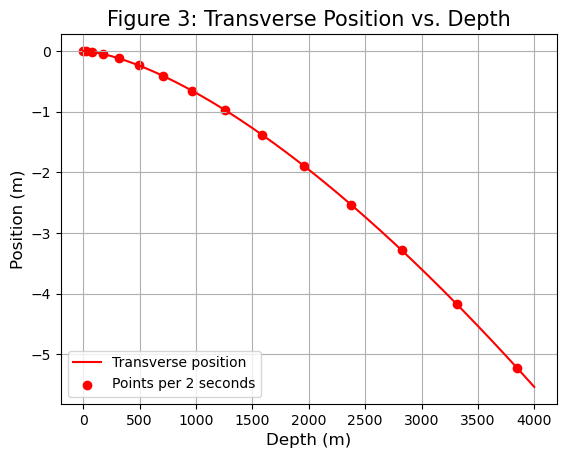

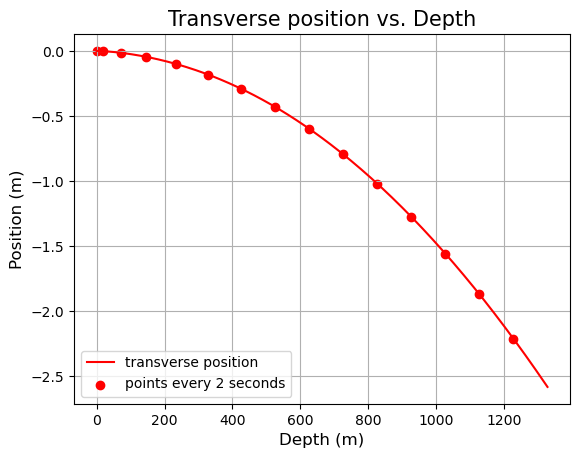

In [52]:
# the coriolis force
# need to do a cross product
def coriolis(t,s, alpha, gamma, omega):
    x, y, z = s[0:3] # only need the first three
    xVector, yVector, zVector = s[3:6]
    aCX = 2*omega*yVector
    aDX = -alpha*np.abs((xVector)**gamma)*np.sign(xVector)
    aGY = -grav(s[1])
    aDY = -alpha*np.abs((yVector)**gamma)*np.sign(yVector) 
    aCY = -2*omega*xVector

    xDVector = aCX
    yDVector = aGY + aDY + aCY
    zDVector = 0
    return np.array((xVector, yVector, zVector, xDVector, yDVector, zDVector))

# finding when it hits the ground
def hitsGround(t, s, alpha, gamma, omega):
    return s[1]-(radiusEarth-d)

t_span = (0,30)
t_eval = np.linspace(t_span[0], t_span[1], 50)
x0 = (0,radiusEarth,0,0,0,0) # starting at the Earth's surface at rest

# Solving
soln = solve_ivp(coriolis, t_span = t_span, t_eval = t_eval, y0=x0, args = (0, 2,earthRot), dense_output=True, events=[hitsGround,(lambda t, s, a, g, o: s[0]+2.5)])
tCross = soln.t_events[0][0]
time = np.linspace(t_span[0],tCross, 300) 
time2 = np.arange(t_span[0], tCross, 2)
print(f"The time it takes to hit the wall is {soln.t_events[1][0]} seconds.")
print(f"The time it takes to reach the bottom of the mine is {tCross} seconds")

# Plotting
fig, ax = plt.subplots()
ax.plot(radiusEarth-soln.sol(time)[1], soln.sol(time)[0], label="Transverse position", color = 'red')
ax.scatter(radiusEarth-soln.sol(time2)[1], soln.sol(time2)[0], label="Points per 2 seconds", color = "red")
ax.set_xlabel("Depth (m)", fontsize=12)
ax.set_ylabel("Position (m)", fontsize=12)
ax.set_title("Figure 3: Transverse Position vs. Depth", fontsize=15)
ax.legend(loc = 'lower left')
ax.grid()

# Part 3.2
# setting spans
t_span = (0,30)
t_eval = np.linspace(t_span[0], t_span[1], 50)
x0 = (0,radiusEarth,0,0,0,0)

# solving
soln = solve_ivp(coriolis, t_span = t_span, t_eval = t_eval, y0=x0, args = (0.0039, 2, earthRot), dense_output=True, events=event)
if soln.t_events[0].size > 0:
    tCross = soln.t_events[0][0]
else:
    tCross = t_span[1]
time = np.linspace(t_span[0],tCross, 300) 
time2 = np.arange(t_span[0], tCross, 2)

# Plotting
fig, ax = plt.subplots(1,1)
ax.plot(radiusEarth-soln.sol(time)[1], soln.sol(time)[0], label="transverse position", color ='red')
ax.scatter(radiusEarth-soln.sol(time2)[1], soln.sol(time2)[0], color ='red', label="points every 2 seconds")
ax.set_xlabel("Depth (m)", fontsize=12)
ax.set_ylabel("Position (m)", fontsize=12)
ax.set_title("Transverse position vs. Depth", fontsize=15)
ax.legend(loc = 'lower left')
ax.grid()

# Part 4: An infinitely deep mine

Crossing is at 1266.5475209727902 seconds and -6378100.0 m, at a velocity of v = -7914.042564159174 m/s
Else 2479.2706788704777 seconds and -12743443.8 m
7905.277129890415
The period is 5069.371199675785 seconds, which is around double the crossing time.


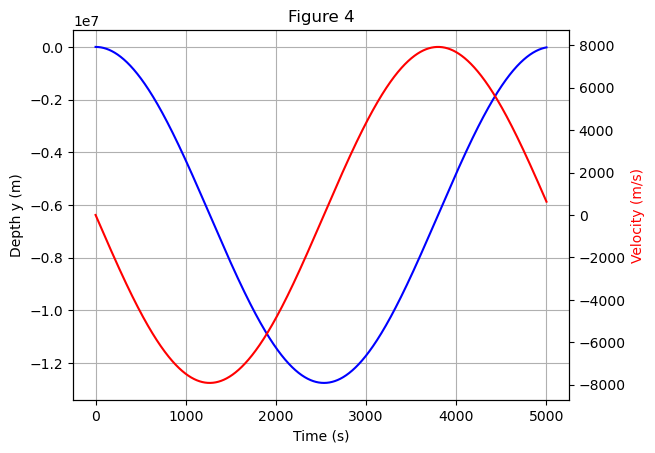

In [70]:
# NUmber 1
# Variables
alpha = 0. # NO DRAG
gamma = 2
omega = np.array([0, 0, 0]) #empty
def grav(r):
    gR = g0*(r/radiusEarth)
    return gR
def derivative(t, x):
    r = x[0:3] # First three element of state vector are 'position'
    v = x[3:6]
    drdt = v
    dvdtx = -2*np.cross(omega, v)[0]
    dvdtz = -2*np.cross(omega, v)[2]
    dvdty = -grav(-np.linalg.norm(r) + radiusEarth) -2*np.cross(omega, v)[1] + alpha*np.abs(v[1])**gamma
    dvdt = np.array([dvdtx, dvdty, dvdtz])
    return np.concatenate((drdt, dvdt)) # like we did in class

def difference(t, s):
    return s[1] + radiusEarth
def difference2(t, s):
    return s[1] + 2*radiusEarth*0.999
difference.terminal = False
difference2.terminal = False

# Solving
# Timing
t0, tf = 0, 5000
t_span = np.linspace(t0, tf, 2000)
IC = [0, 0, 0, 0, 0, 0]
soln = solve_ivp(fun = derivative, t_span=(t0,tf), y0=IC, t_eval=t_span, atol = 0.2073, events = (difference, difference2))
tVals = soln.t
yxVals = soln.y[0]
yyVals = soln.y[1]
yzVals = soln.y[2]
vxVals = soln.y[3]
vyVals = soln.y[4]
vzVals = soln.y[5]

#%matplotlib widget
fig, ax = plt.subplots()
ax.plot(tVals, yyVals, label = 'Depth (m)', color = 'blue')
ax0 = ax.twinx()
ax0.plot(tVals, vyVals, label = 'Velocity (m/s)', color = 'red')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Depth y (m)')
ax0.set_ylabel('Velocity (m/s)', color = 'red')
ax.set_title('Figure 4')
ax.grid()

print(f'Crossing is at {soln.t_events[0][0]} seconds and {soln.y_events[0][0][1]} m, at a velocity of v = {soln.y_events[0][0][4]} m/s')
print(f'Else {soln.t_events[1][0]} seconds and {soln.y_events[1][0][1]} m')

crossVel = np.sqrt(G*massEarth/radiusEarth) # m/s
print(crossVel)
period = 2*np.pi*radiusEarth/crossVel # seconds

print(f'The period is {period} seconds, which is around double the crossing time.')

# Part 5: A non-uniform Earth

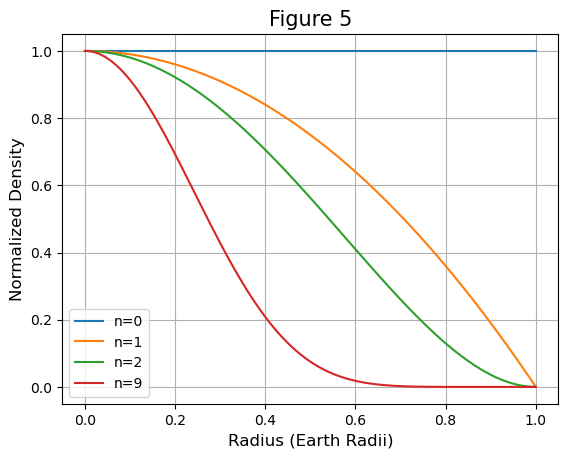

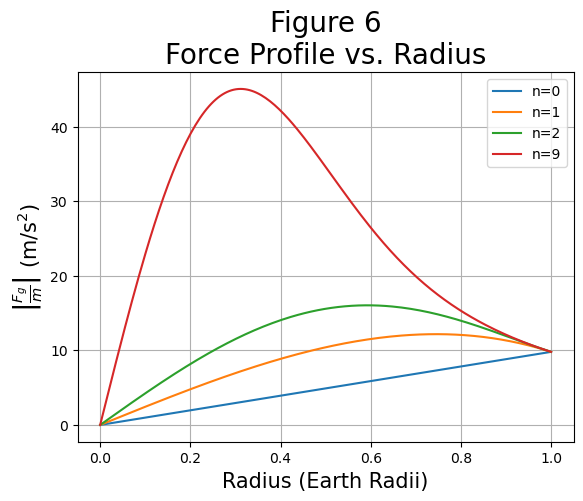

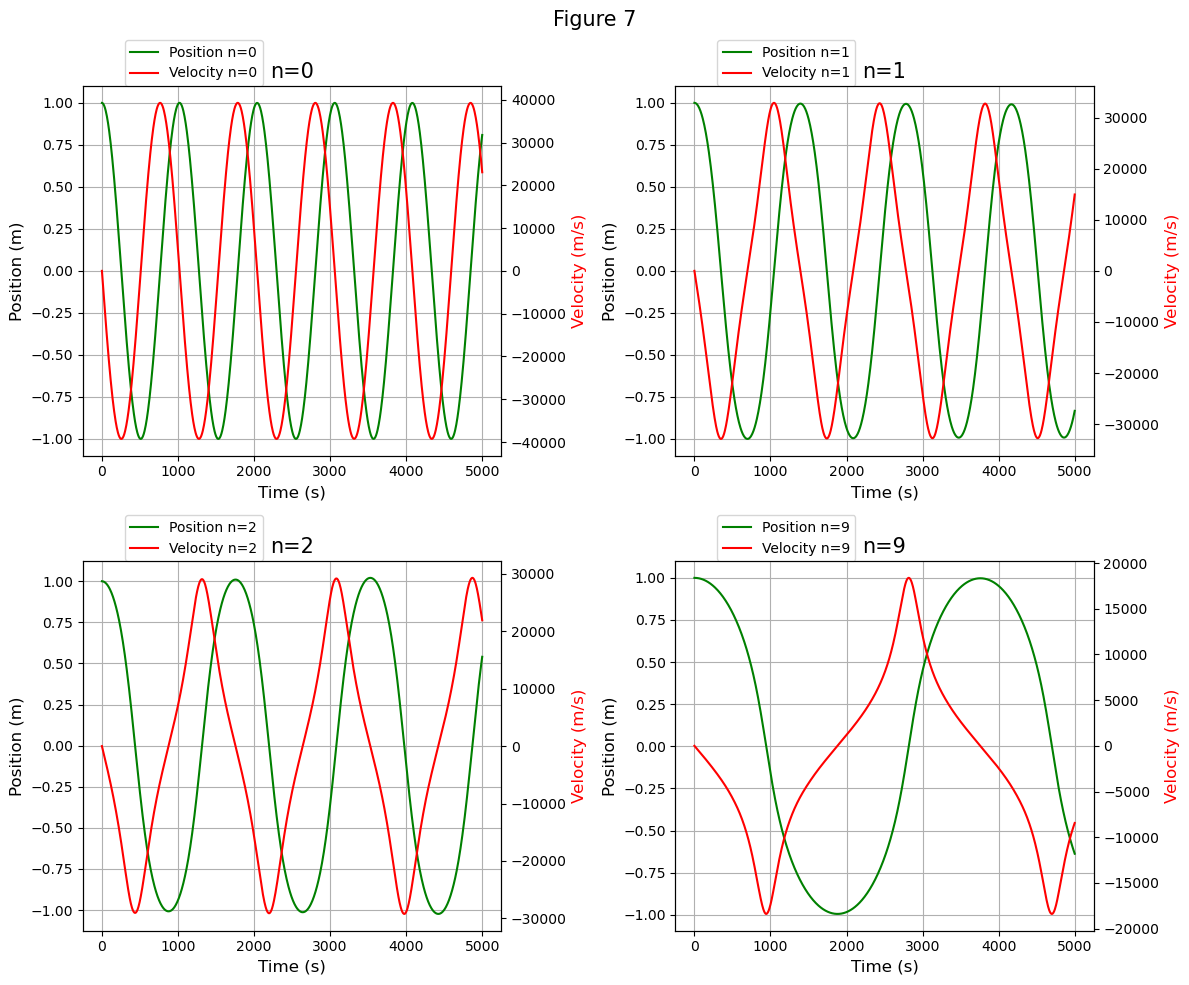

In [55]:
# Functions
def rho(r, rho0, N):
    return rho0*(1-r**2/radiusEarth**2)**N
def densityMass(r, rho0, N):
    return 4*np.pi * r**2 * rho(r, rho0,N)
def totMass(r, rho0, N):
    return quad(densityMass, 0, r,args=(rho0, N))[0]

x = np.linspace(1, radiusEarth,200)

nVector = [0, 1, 2, 9]
# Plotting Fgure 5
fig, ax = plt.subplots(1,1)
for n in nVector:
    ax.plot(x/radiusEarth, rho(x, 1, n), label=f"n={n}")
ax.set_xlabel("Radius (Earth Radii)", fontsize=12)
ax.set_ylabel("Normalized Density", fontsize=12)
ax.set_title("Figure 5", fontsize=15)
ax.grid()
ax.legend()

# Plotting Figure 6
fig, ax = plt.subplots(1,1)
for n in nVector:
    mass = totMass(radiusEarth, 1, n)
    Rho0 = massEarth/mass 
    x1 = np.zeros_like(x)
    for i in range(len(x)):
        x1[i] = G*totMass(x[i],Rho0,n)/x[i]**2
    ax.plot(x/radiusEarth, x1, label=f"n={n}")
ax.legend()
ax.set_title("Figure 6\nForce Profile vs. Radius", fontsize=20)
ax.set_xlabel("Radius (Earth Radii)", fontsize=15)
ax.set_ylabel("$\\left|\\frac{F_g}{m}\\right|$ (m/s$^2$)", fontsize=15)
ax.grid()

# Function neglect drag and cori
def der(t, x, Rho0, N):
    y = x[0]
    yVector = x[1]
    yVector2 = -np.sign(y)*G*totMass(np.abs(y), Rho0, N)/np.abs(y)**2
    return np.array((yVector, yVector2))
def event(t, x, Rho0, N):
    return x[0]
    
# Plotting
fig, axs = plt.subplots(2,2, figsize=(12,10))
axs = axs.flatten()
t_span = (0,5000)
t_eval= np.linspace(t_span[0],t_span[1],200)
density = np.linspace(t_span[0], t_span[1],1000)
x0 = (radiusEarth, 0)
for i in range(len(nVector)):
    ax = axs[i]
    ax2 = ax.twinx()
    rho0 = massEarth/totMass(radiusEarth, 1, nVector[i])
    soln = solve_ivp(der,t_span=t_span, t_eval=t_eval, y0=x0, dense_output=True, args=(Rho0, nVector[i]), events=event)
    ax.plot(density, soln.sol(density)[0]/radiusEarth, label=f"Position n={nVector[i]}", color="green")
    ax.plot([],[],color="red", label=f"Velocity n={nVector[i]}") 
    ax.set_xlabel("Time (s)", fontsize=12)
    ax.set_ylabel("Position (m)", fontsize=12)
    ax2.set_ylabel("Velocity (m/s)", color="red", fontsize=12)
    ax2.plot(density, soln.sol(density)[1], label=f"Velocity n={nVector[i]}", color="red")
    ax.set_title(f"n={nVector[i]}", fontsize=15)
    fig.suptitle("Figure 7", fontsize=15)
    ax.grid()
    ax.legend(loc=(0.1, 1))
fig.tight_layout() # fixing the layout of the graphs

# Part 6: A lunar mine shaft

Time to center of Moon: 1624.9 s
Speed at center: -1679.95 m/s
The density of Moon is 3.34 g/cm^3 which is roughly 60% of the Earth's density of 5.49 g/cm^3


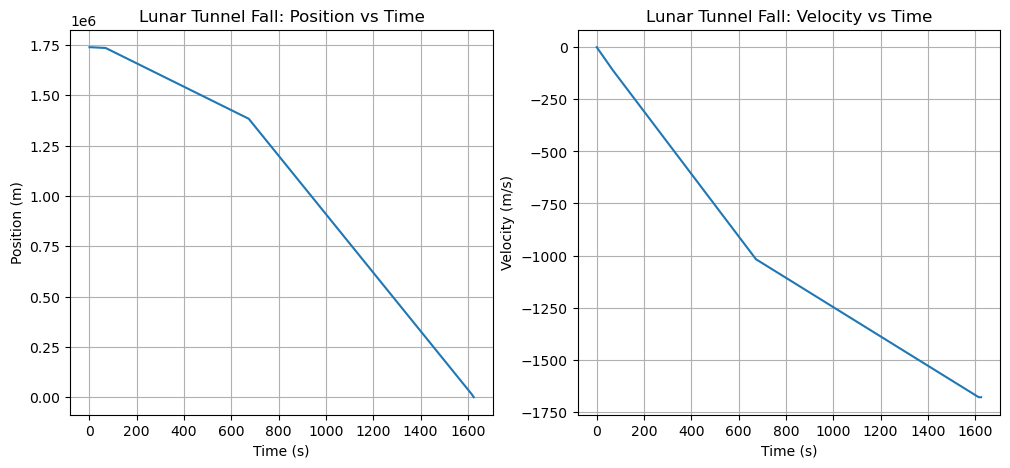

In [56]:
# Part 6
# avoid the coriolis force since it is extremely small on the moon, also no drag
gMoonSurf = G * massMoon / radiusMoon**2
rhoMoon = massMoon / ((4 / 3) * np.pi * radiusMoon**3)
def gInsideMoon(r):
    return gMoonSurf * r / radiusMoon

def moonFall(t, y):
    position, velocity = y
    g = -gInsideMoon(abs(position)) * np.sign(position)  # always pulls toward center
    return [velocity, g]

# crossing the center (y=0)
def crossingCenter(t, y):
    return y[0]
crossingCenter.terminal = True
crossingCenter.direction = 0

# IC: start at Moon surface, heading toward center
y0 = [radiusMoon, 0]  # [position (m), velocity (m/s)]

# Solving
soln = solve_ivp(moonFall, t_span=[0, 2000], y0=y0, events=crossingCenter, dense_output=True)
timeToCenter = soln.t_events[0][0]
speedAtCenter = soln.y_events[0][0][1]

# Plotting to see the fall/orbit
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(soln.t, soln.y[0])
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Position (m)")
ax1.set_title("Lunar Tunnel Fall: Position vs Time")
ax1.grid()

ax2.plot(soln.t, soln.y[1])
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Velocity (m/s)")
ax2.set_title("Lunar Tunnel Fall: Velocity vs Time")
ax2.grid()

# density of the earth and moon
densityEarth = massEarth/ ((4/3)*np.pi * radiusEarth**3) * 0.001 # g/cm^3
densityMoon = massMoon / ((4/3)*np.pi * radiusMoon**3) * 0.001 # g/cm^3
print(f"Time to center of Moon: {timeToCenter:.1f} s")
print(f"Speed at center: {speedAtCenter:.2f} m/s")
print(f"The density of Moon is {densityMoon:.2f} g/cm^3 which is roughly 60% of the Earth's density of {densityEarth:.2f} g/cm^3")